In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [8]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [7]:
df.isna().sum()

,0
Survived,0
Age,0
Fare,0


In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [15]:
x=df.iloc[:,1:]
y=df['Survived']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

/tmp/ipython-input-2498337408.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


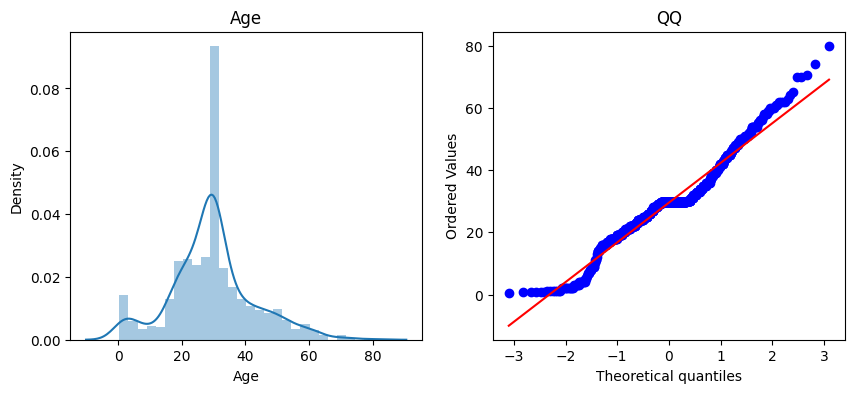

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age')


plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('QQ')
plt.show()

/tmp/ipython-input-2337261025.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


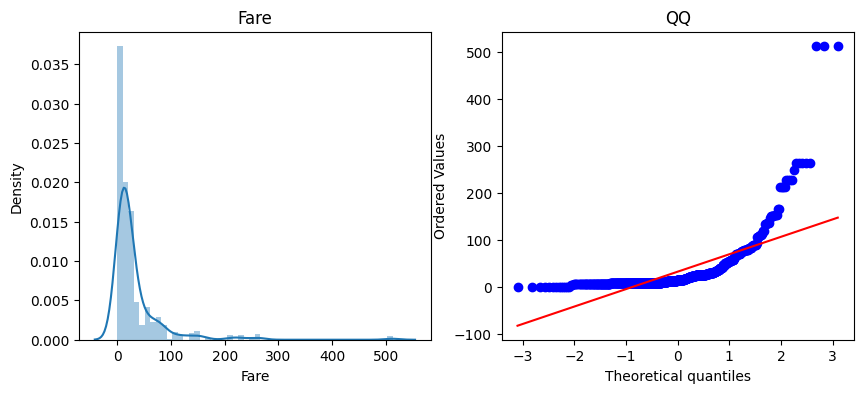

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare')


plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('QQ')
plt.show()

# without transformation funnctions

In [20]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [21]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred=clf.predict(x_test)
y_pred2=clf2.predict(x_test)

print('Logistic Regression',accuracy_score(y_test,y_pred))
print('Decision Tree',accuracy_score(y_test,y_pred2))

Logistic Regression 0.6480446927374302
Decision Tree 0.6871508379888268


In [22]:
trf=FunctionTransformer(np.log1p)

In [23]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)

In [24]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred=clf.predict(x_test_transformed)
y_pred2=clf2.predict(x_test_transformed)

print('Logistic Regression',accuracy_score(y_test,y_pred))
print('Decision Tree',accuracy_score(y_test,y_pred2))

Logistic Regression 0.6815642458100558
Decision Tree 0.6703910614525139


In [25]:
#we can see the improvements in Logistic one

In [26]:
x_transformed=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print('Logistic Regression',cross_val_score(clf,x_transformed,y,cv=5).mean())
print('Decision Tree',cross_val_score(clf2,x_transformed,y,cv=5).mean())

Logistic Regression 0.6780114242671521
Decision Tree 0.6442282342602472


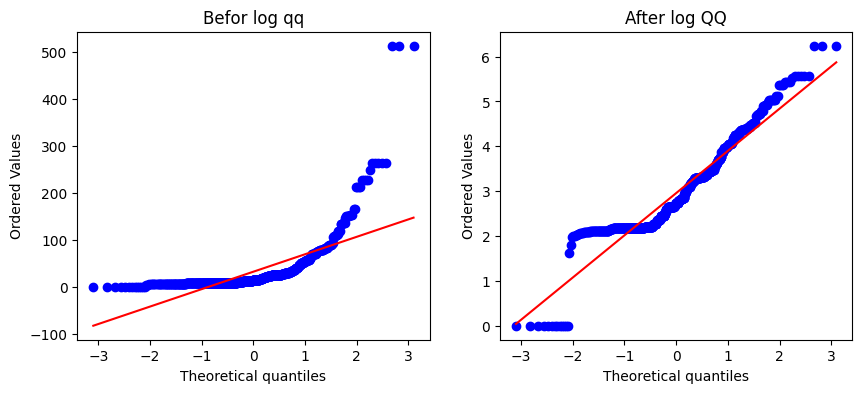

In [28]:
plt.figure(figsize=(10,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Befor log qq')


plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('After log QQ')
plt.show()

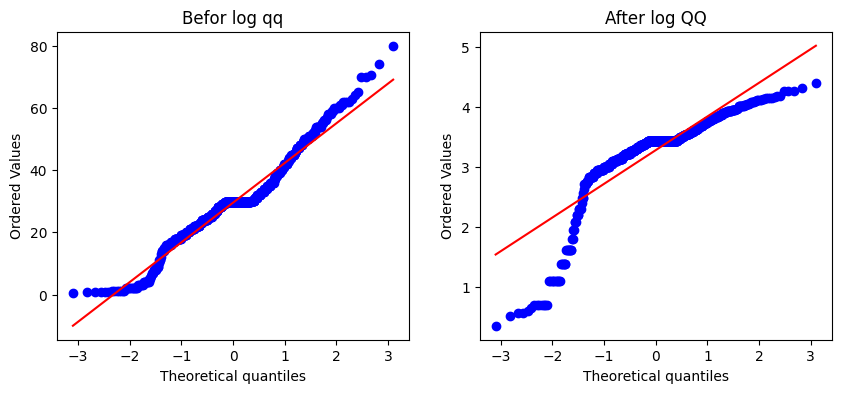

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Befor log qq')


plt.subplot(122)
stats.probplot(x_train_transformed['Age'],dist='norm',plot=plt)
plt.title('After log QQ')
plt.show()

# here our pefromance is decreasing

In [30]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2=trf2.fit_transform(x_train)
x_test_transformed2=trf2.transform(x_test)

In [32]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

y_pred=clf.predict(x_test_transformed2)
y_pred2=clf2.predict(x_test_transformed2)

print('Logistic Regression',accuracy_score(y_test,y_pred))
print('Decision Tree',accuracy_score(y_test,y_pred2))

Logistic Regression 0.6703910614525139
Decision Tree 0.6759776536312849


In [33]:
#  our fare was right skewed so after applying log transformationn our performance is increased

In [41]:
def apply_transform(transform):
  x=df.iloc[:,1:]
  y=df.iloc[:,0]

  trf=ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

  x_transformed=trf.fit_transform(x)

  clf=LogisticRegression()
  print('Logistic Regression',cross_val_score(clf,x_transformed,y,cv=5).mean())

  plt.figure(figsize=(10,4))
  plt.subplot(121)
  stats.probplot(x['Fare'],dist='norm',plot=plt)
  plt.title('Befor log qq')

  plt.subplot(122)
  stats.probplot(x_transformed[:,0],dist='norm',plot=plt)
  plt.title('After log QQ')
  plt.show()

Logistic Regression 0.6588726382524637


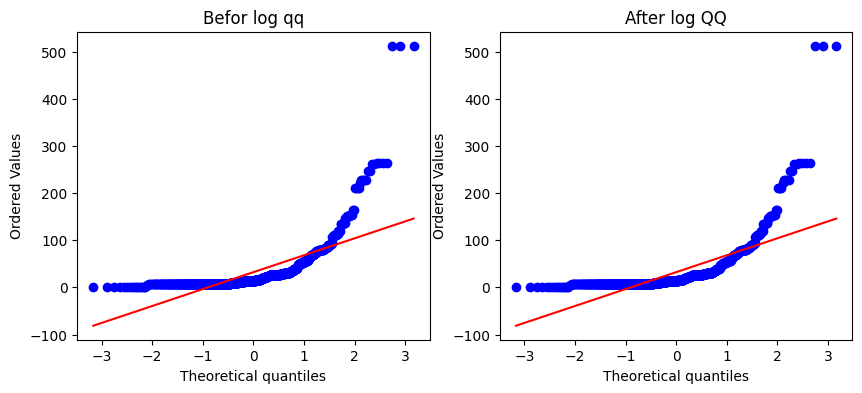

In [42]:
apply_transform(lambda x:x)

Logistic Regression 0.6419998744586026


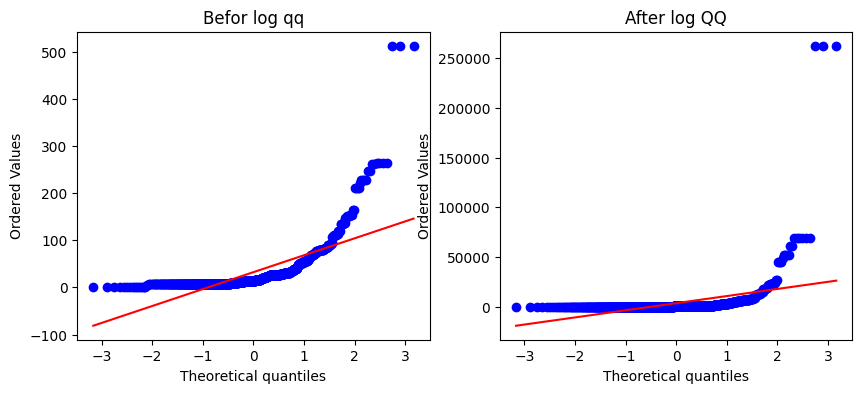

In [43]:
apply_transform(lambda x:x**2)

Logistic Regression 0.6251522189441969


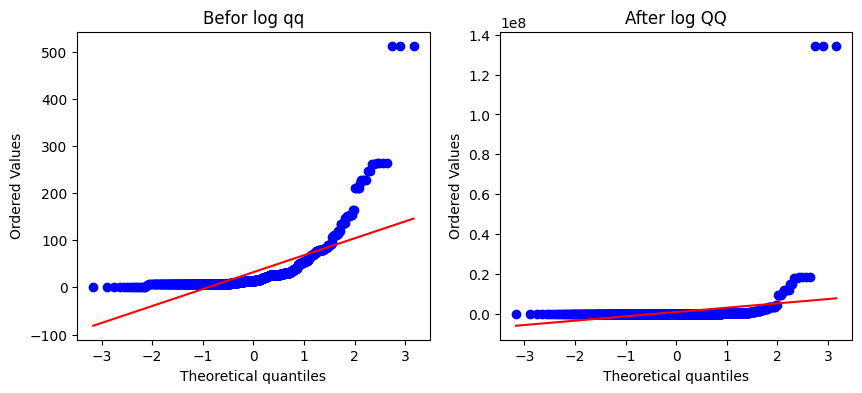

In [44]:
apply_transform(lambda x:x**3)

Logistic Regression 0.6588726382524637


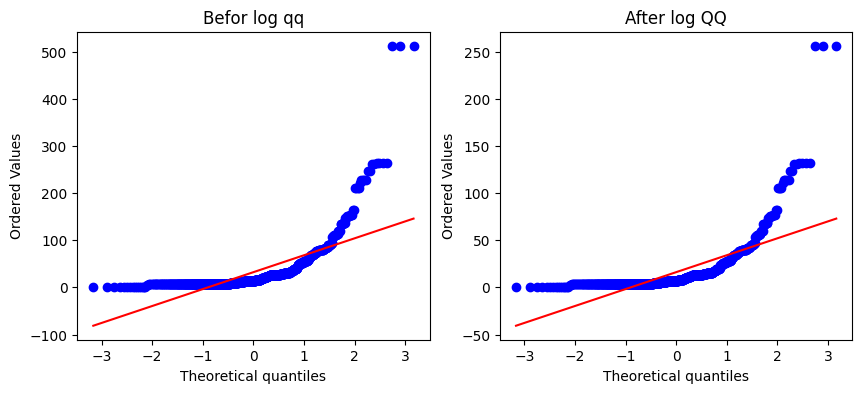

In [45]:
apply_transform(lambda x:x**1/2)

Logistic Regression 0.6161634548992531


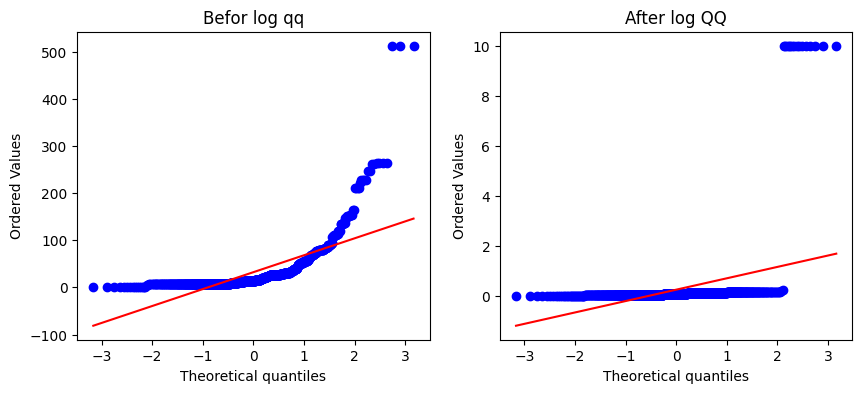

In [48]:
apply_transform(lambda x:1/(x+0.1))

Logistic Regression 0.6206390057121336


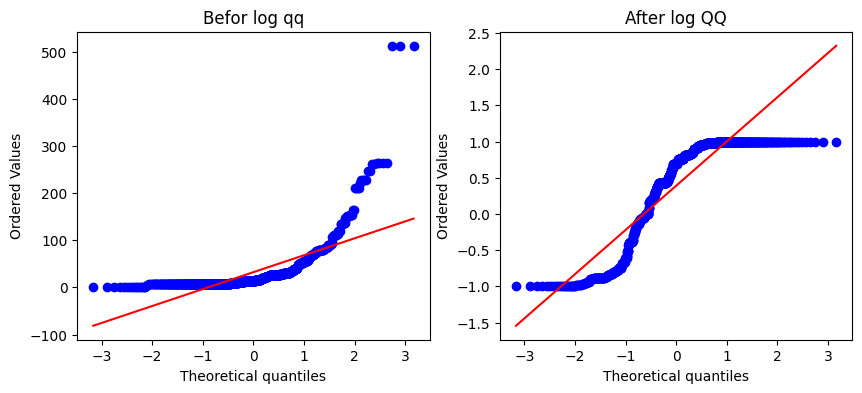

In [50]:
apply_transform(np.sin)

Logistic Regression 0.6195342414161069


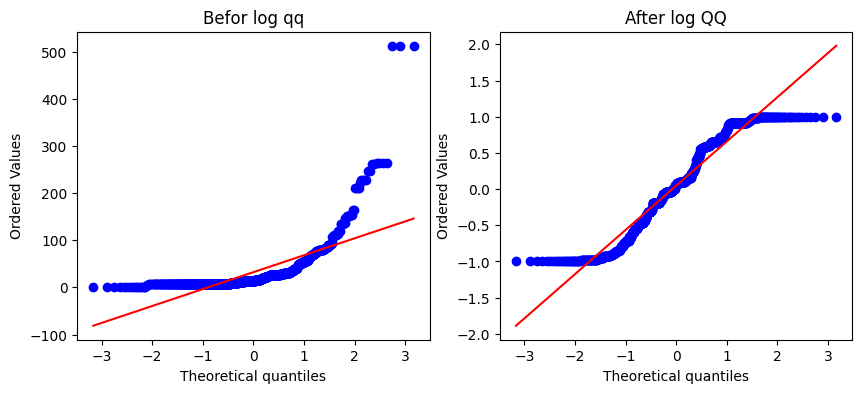

In [51]:
apply_transform(np.cos)